# Lab | Making predictions with logistic regression
# ========================================

### In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

#### Instructions
##### 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
##### 2. Read the data into a Pandas dataframe.
##### 3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
##### 4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
##### 5. Create a logistic regression model to predict this variable from the cleaned data.
##### 6. Evaluate the results.

In [1]:
# Import Libraries

from sqlalchemy import create_engine
import pandas as pd
from getpass import getpass 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
password = getpass("INSERT YOUR PASSWORD: ")

INSERT YOUR PASSWORD: ········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

### 1. Create query
### 2. Read data into Pandas dataframe

In [4]:

sak = pd.read_sql_query("SELECT * FROM rental JOIN inventory USING (inventory_id) JOIN film USING (film_id) JOIN film_category USING (film_id) JOIN category USING (category_id);", engine)
sak.head()

,category_id,film_id,inventory_id,rental_id,rental_date,customer_id,return_date,staff_id,last_update,store_id,last_update,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,last_update,name,last_update
0,1,19,93,10895,2005-08-02 01:16:59,77,2005-08-03 02:41:59,2,2006-02-15 21:30:53,1,2006-02-15 05:09:17,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,2006-02-15 05:07:09,Action,2006-02-15 04:46:27
1,1,19,93,12268,2005-08-18 04:26:54,39,2005-08-23 06:40:54,2,2006-02-15 21:30:53,1,2006-02-15 05:09:17,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,2006-02-15 05:07:09,Action,2006-02-15 04:46:27
2,1,19,94,3150,2005-06-20 20:35:28,34,2005-06-26 01:01:28,1,2006-02-15 21:30:53,1,2006-02-15 05:09:17,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,2006-02-15 05:07:09,Action,2006-02-15 04:46:27
3,1,19,94,5072,2005-07-09 05:01:58,254,2005-07-18 08:17:58,2,2006-02-15 21:30:53,1,2006-02-15 05:09:17,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,2006-02-15 05:07:09,Action,2006-02-15 04:46:27
4,1,19,94,9080,2005-07-30 08:02:39,276,2005-08-06 12:02:39,1,2006-02-15 21:30:53,1,2006-02-15 05:09:17,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,0.99,113,20.99,PG,"Commentaries,Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,2006-02-15 05:07:09,Action,2006-02-15 04:46:27


### 3. Analyze extracted data

In [5]:
sak.info()
# checking nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   category_id           16045 non-null  int64         
 1   film_id               16045 non-null  int64         
 2   inventory_id          16045 non-null  int64         
 3   rental_id             16045 non-null  int64         
 4   rental_date           16045 non-null  datetime64[ns]
 5   customer_id           16045 non-null  int64         
 6   return_date           15862 non-null  datetime64[ns]
 7   staff_id              16045 non-null  int64         
 8   last_update           16045 non-null  datetime64[ns]
 9   store_id              16045 non-null  int64         
 10  last_update           16045 non-null  datetime64[ns]
 11  title                 16045 non-null  object        
 12  description           16045 non-null  object        
 13  release_year    

In [6]:
sak.columns

Index(['category_id', 'film_id', 'inventory_id', 'rental_id', 'rental_date',
       'customer_id', 'return_date', 'staff_id', 'last_update', 'store_id',
       'last_update', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update',
       'last_update', 'name', 'last_update'],
      dtype='object')

In [7]:
# dropping some columns. thought of adding language table, mas the movies are all in english

sak = sak.drop(["rental_id" , "category_id","return_date", "film_id", "inventory_id", "customer_id","description","language_id",
                'original_language_id','special_features','last_update'], axis=1)

In [8]:
sak.head()

,rental_date,staff_id,store_id,title,release_year,rental_duration,rental_rate,length,replacement_cost,rating,name
0,2005-08-02 01:16:59,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
1,2005-08-18 04:26:54,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
2,2005-06-20 20:35:28,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
3,2005-07-09 05:01:58,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
4,2005-07-30 08:02:39,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action


In [9]:
sak["rental_duration"].unique()

array([6, 3, 5, 7, 4])

In [10]:
# modify the date to month and year... the day is not relevant in this "project"
sak['rental_date'] = sak['rental_date'].dt.strftime("%m-%Y")
sak.head()

,rental_date,staff_id,store_id,title,release_year,rental_duration,rental_rate,length,replacement_cost,rating,name
0,08-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
1,08-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
2,06-2005,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
3,07-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action
4,07-2005,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action


In [11]:
sak['rented_last_month_?'] = sak["rental_date"] == "02-2006"
sak.head()

,rental_date,staff_id,store_id,title,release_year,rental_duration,rental_rate,length,replacement_cost,rating,name,rented_last_month_?
0,08-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action,False
1,08-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action,False
2,06-2005,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action,False
3,07-2005,2,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action,False
4,07-2005,1,1,AMADEUS HOLY,2006,6,0.99,113,20.99,PG,Action,False


In [12]:
# just checking
sak_t = sak[sak["rental_date"] == "02-2023"]
sak_t.head(10)

,rental_date,staff_id,store_id,title,release_year,rental_duration,rental_rate,length,replacement_cost,rating,name,rented_last_month_?
5106,02-2023,1,1,ACADEMY DINOSAUR,2006,6,0.99,86,20.99,PG,Documentary,False


In [13]:
sak["staff_id"].unique()

array([2, 1])

In [14]:
sak["store_id"].unique()

array([1, 2])

In [15]:
sak["title"].nunique()

958

In [16]:
sak["release_year"].unique() #DROP IT

array([2006])

In [17]:
sak = sak.drop(["release_year"], axis=1)
sak.head()

,rental_date,staff_id,store_id,title,rental_duration,rental_rate,length,replacement_cost,rating,name,rented_last_month_?
0,08-2005,2,1,AMADEUS HOLY,6,0.99,113,20.99,PG,Action,False
1,08-2005,2,1,AMADEUS HOLY,6,0.99,113,20.99,PG,Action,False
2,06-2005,1,1,AMADEUS HOLY,6,0.99,113,20.99,PG,Action,False
3,07-2005,2,1,AMADEUS HOLY,6,0.99,113,20.99,PG,Action,False
4,07-2005,1,1,AMADEUS HOLY,6,0.99,113,20.99,PG,Action,False


In [18]:
sak["rental_rate"].unique()

array([0.99, 4.99, 2.99])

In [19]:
sak["replacement_cost"].unique()

array([20.99, 17.99, 11.99, 15.99, 24.99, 21.99, 27.99, 16.99, 13.99,
       22.99, 14.99, 12.99, 26.99, 18.99, 19.99, 28.99, 29.99,  9.99,
       23.99, 25.99, 10.99])

In [20]:
sak["length"].nunique()

140

In [21]:
sak["rating"].unique()

array(['PG', 'R', 'NC-17', 'G', 'PG-13'], dtype=object)

In [22]:
sak["name"].unique()

array(['Action', 'Animation', 'Children', 'Classics', 'Comedy',
       'Documentary', 'Drama', 'Family', 'Foreign', 'Games', 'Horror',
       'Music', 'New', 'Sci-Fi', 'Sports', 'Travel'], dtype=object)

In [23]:
sak["title"].value_counts()

BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
JUGGLER HARDLY         32
                       ..
INFORMER DOUBLE         5
GLORY TRACY             5
TRAIN BUNCH             4
MIXED DOORS             4
HARDLY ROBBERS          4
Name: title, Length: 958, dtype: int64

In [24]:
# divide numerical and categorical

In [25]:
num_sak = sak.select_dtypes(include=["int64","float64"])
num_sak.head()

,staff_id,store_id,rental_duration,rental_rate,length,replacement_cost
0,2,1,6,0.99,113,20.99
1,2,1,6,0.99,113,20.99
2,1,1,6,0.99,113,20.99
3,2,1,6,0.99,113,20.99
4,1,1,6,0.99,113,20.99


In [26]:
# will treat the staff id and store id as categoricals so, i'll drop them from the numerical

In [27]:
num_sak = num_sak.drop(["staff_id", "store_id"], axis=1)
num_sak.head()

,rental_duration,rental_rate,length,replacement_cost
0,6,0.99,113,20.99
1,6,0.99,113,20.99
2,6,0.99,113,20.99
3,6,0.99,113,20.99
4,6,0.99,113,20.99


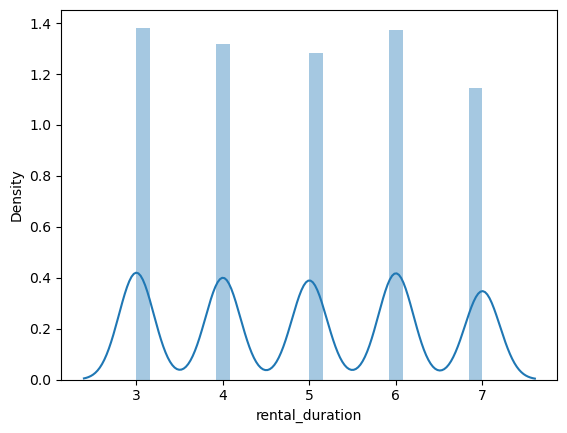

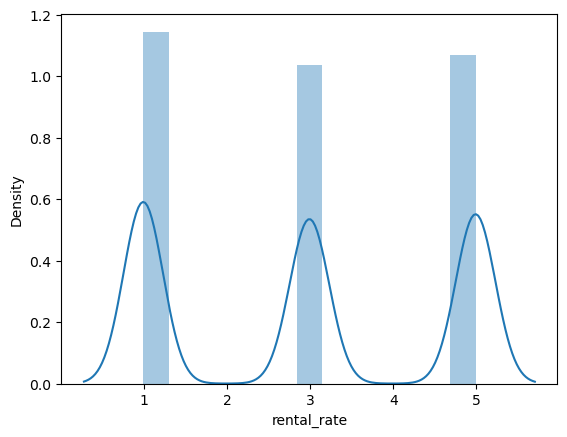

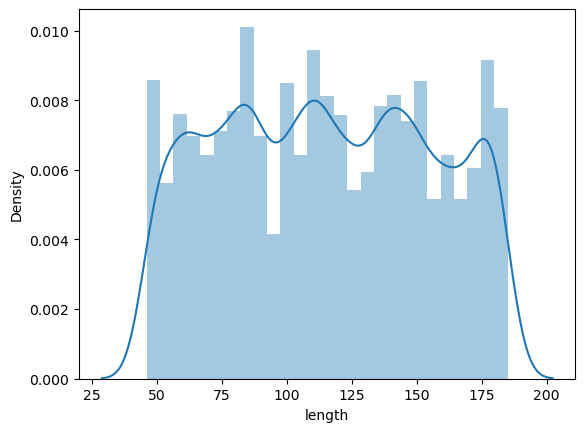

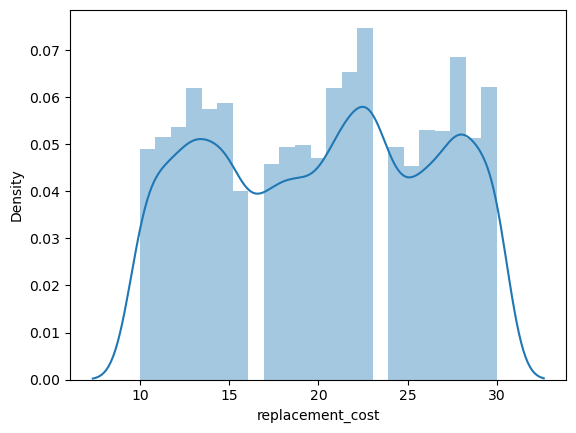

In [28]:
for column in num_sak.columns:
    sns.distplot(num_sak[column])
    plt.show()

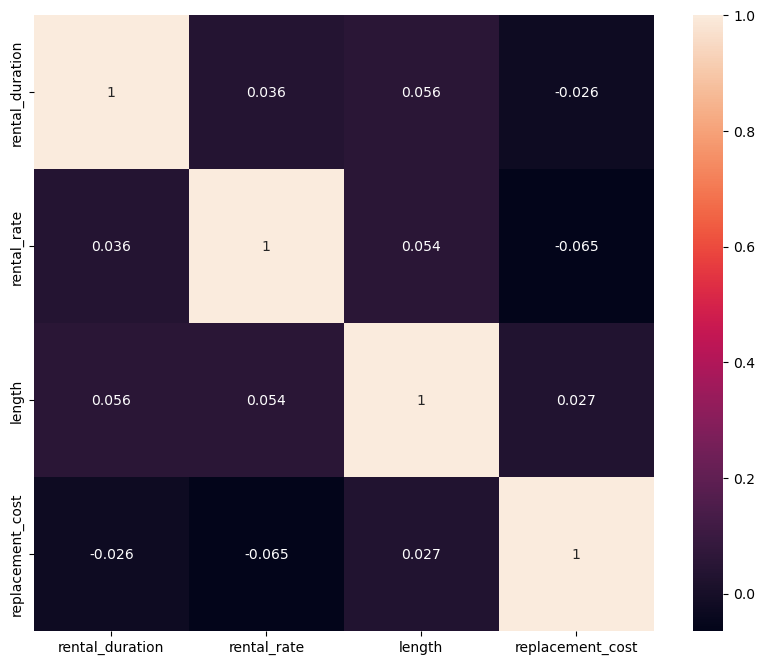

In [29]:
corr_matrix=num_sak.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [30]:
cat_sak = sak.drop(["title","rental_duration","rental_rate","length"], axis = 1)
cat_sak.head()

,rental_date,staff_id,store_id,replacement_cost,rating,name,rented_last_month_?
0,08-2005,2,1,20.99,PG,Action,False
1,08-2005,2,1,20.99,PG,Action,False
2,06-2005,1,1,20.99,PG,Action,False
3,07-2005,2,1,20.99,PG,Action,False
4,07-2005,1,1,20.99,PG,Action,False


In [31]:
# encoding categorical

In [32]:
cat_sak_dumm = pd.get_dummies(cat_sak, drop_first = True)
cat_sak_dumm.head()

,staff_id,store_id,replacement_cost,rented_last_month_?,rental_date_02-2023,rental_date_05-2005,rental_date_06-2005,rental_date_07-2005,rental_date_08-2005,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,name_Comedy,name_Documentary,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,2,1,20.99,False,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,20.99,False,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,20.99,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,20.99,False,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,20.99,False,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# X-y split

In [34]:
cat_sak_dumm_without_target = cat_sak_dumm.drop(["rented_last_month_?"], axis = 1)
cat_sak_dumm_without_target.head()

,staff_id,store_id,replacement_cost,rental_date_02-2023,rental_date_05-2005,rental_date_06-2005,rental_date_07-2005,rental_date_08-2005,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,name_Comedy,name_Documentary,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,2,1,20.99,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,20.99,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,20.99,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,20.99,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,20.99,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y = cat_sak_dumm['rented_last_month_?'] 
X = np.concatenate((num_sak, cat_sak_dumm_without_target), axis=1) 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [37]:
len(X_train)

11231

In [38]:
len(X_test)

4814

In [39]:
y_train

13183    False
13614    False
11336    False
10803    False
6149     False
         ...  
11050    False
14148    False
784      False
12905    False
1818     False
Name: rented_last_month_?, Length: 11231, dtype: bool

In [40]:
# Apply model

In [41]:
classification = LogisticRegression(random_state=0,multi_class='multinomial').fit(X_train, y_train)

In [42]:
predictions = classification.predict(X_test)

In [43]:
pd.Series(predictions).value_counts()

False    4756
True       58
dtype: int64

In [44]:
y_test.value_counts()

False    4757
True       57
Name: rented_last_month_?, dtype: int64

In [45]:
# Evaluate model with confusion matrix and accuracy

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4756,    1],
       [   0,   57]])

In [47]:
cm = confusion_matrix(y_test,predictions)

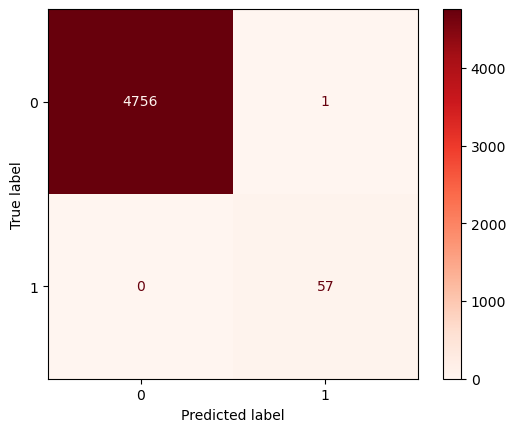

In [48]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()

In [49]:
# Evaluate model

In [50]:
classification.score(X_test, y_test)

0.9997922725384296

In [51]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 1.00



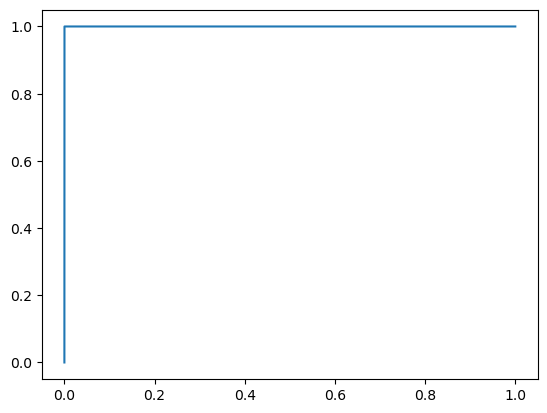

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

The accuracy of the model on test set is: 1.00 
[[4756    1]
 [   0   57]]


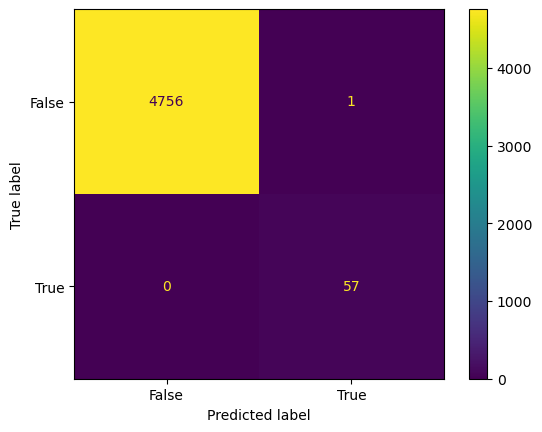

The Kappa of your model is: 0.99


In [53]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()  
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))